In [2]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 6.6 MB/s eta 0:00:00


In [3]:
import praw
import time
from praw.models import MoreComments
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [10]:
df = pd.read_csv('sample_data/Tweets.csv')
print(df.shape)
print(df.head())

(14640, 15)
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                   

In [11]:
def clean_tweet(tweet):
  tweet = tweet.strip().lower().split()
  tweet = [word for word in tweet if 'http' not in word]
  tweet = ' '.join([re.sub(r"[^a-zA-Z0-9 ]", "", word) for word in tweet if '@' not in word])
  return tweet

df['text'] = df['text'].apply(lambda x: clean_tweet(x))
print(df['text'])

0                                                what said
1        plus youve added commercials to the experience...
2        i didnt today must mean i need to take another...
3        its really aggressive to blast obnoxious enter...
4                  and its a really big bad thing about it
                               ...                        
14635    thank you we got on a different flight to chicago
14636    leaving over 20 minutes late flight no warning...
14637       please bring american airlines to blackberry10
14638    you have my money you change my flight and don...
14639    we have 8 ppl so we need 2 know how many seats...
Name: text, Length: 14640, dtype: object


In [12]:
print(df['airline_sentiment'].value_counts())

df['airline_sentiment'] = df['airline_sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
df = df.sort_values(by='airline_sentiment')

print(df['airline_sentiment'])

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
7319    -1
11625   -1
6512    -1
11624   -1
6514    -1
        ..
4822     1
7735     1
4818     1
10895    1
4078     1
Name: airline_sentiment, Length: 14640, dtype: int64


In [13]:
df = df[6815:]
df1 = df[:2363]
df2 = df[3099:]
df = pd.concat([df1, df2])

df['airline_sentiment'] = df['airline_sentiment'].map({-1: 'negative', 0: 'neutral', 1: 'positive'})
print(df['airline_sentiment'].value_counts())

negative    2363
neutral     2363
positive    2363
Name: airline_sentiment, dtype: int64


In [14]:
X = df['text']
y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = Pipeline([
      ('count', CountVectorizer()),
      ('tfidf', TfidfTransformer()),
      ('scale', MaxAbsScaler()),
      ('alg', LogisticRegression(max_iter=10000)) 
])

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.7366046249294981


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


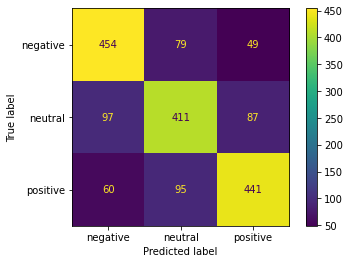

In [ ]:
print(plot_confusion_matrix(model, X_test, y_test))

In [15]:
reddit = praw.Reddit(client_id='GonTIEqiw0BUCJHvltRDZg', client_secret='LRZrdlt-EJdlbUF9cYkBCxhf5CNj6g', user_agent='Scraping', check_for_async=False)

In [18]:
top_posts = reddit.subreddit('Conservative').hot(limit=1000)

conservative_comments = []
num_posts = 0
for post in top_posts:
  num_comments = 0
  for comment in post.comments:
    if not comment.stickied and not isinstance(comment, MoreComments):
      comment_body = str(comment.body)
      conservative_comments.append(comment_body)
      num_comments += 1
    if (num_comments == 10): break

  num_posts += 1
  if (num_posts % 100 == 0):
    print(f"Completed {num_posts} so far!")

print(len(conservative_comments))
print(conservative_comments[-1])

Completed 100 so far!


Completed 200 so far!
Completed 300 so far!
Completed 400 so far!
Completed 500 so far!
Completed 600 so far!
Completed 700 so far!
4183
Armalite offers some pretty inexpensive options that will also work.


In [ ]:
top_posts = reddit.subreddit('politics').hot(limit=1000)

liberal_comments = []
num_posts = 0
for post in top_posts:
  num_comments = 0
  for comment in post.comments:
    if not comment.stickied and not isinstance(comment, MoreComments):
      comment_body = str(comment.body)
      liberal_comments.append(comment_body)
      num_comments += 1
    if (num_comments == 10): break

  num_posts += 1
  if (num_posts % 100 == 0):
    print(f"Completed {num_posts} so far!")

print(len(liberal_comments))
print(liberal_comments[-1])

Completed 100 so far!
Completed 200 so far!
Completed 300 so far!
Completed 400 so far!
Completed 500 so far!
Completed 600 so far!
Completed 700 so far!
5969
Gooble gobble! One of us! One of us!


In [ ]:
total_comments = conservative_comments + liberal_comments
identification = [0 for i in range(len(conservative_comments))] + [1 for i in range(len(liberal_comments))]

df = pd.DataFrame({
    'Comment': total_comments,
    'Politics':identification
})
df.to_csv('sample_data/politics.csv', index=False)

In [ ]:
df = pd.read_csv('sample_data/politics.csv')

In [ ]:
df['Comment'] = df['Comment'].apply(lambda c: clean_tweet(c))
print(df['Comment'])

0        amazing how quickly twitter went from being a ...
1        the only thing that should be heavy regulated ...
2           influential people like this should be ignored
3        dudes career must be in the gutter if this is ...
4        ive said this so many times before but leftwin...
                               ...                        
10529                when do we get to hear more testimony
10530                           what did you do josh lyman
10531    classic narcissist although most manage to not...
10532    the thumbnail makes him look like a pointyhead...
10533                    gooble gobble one of us one of us
Name: Comment, Length: 10534, dtype: object


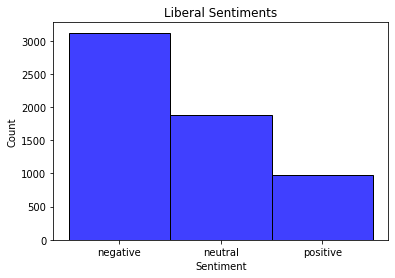

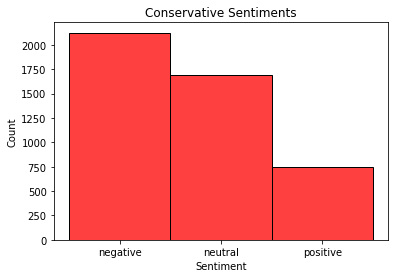

In [ ]:
df['sentiment'] = np.array(model.predict(df['Comment'])).flatten()
df['sentiment'] = pd.Categorical(df['sentiment'], ['negative', 'neutral', 'positive'])

liberal_sentiment = df[df['Politics'] == 1]['sentiment']
conservative_sentiment = df[df['Politics'] == 0]['sentiment']

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Liberal Sentiments')
sns.histplot(x=liberal_sentiment, color='b')
plt.show()

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Conservative Sentiments')
sns.histplot(x=conservative_sentiment, color='r')
plt.show()

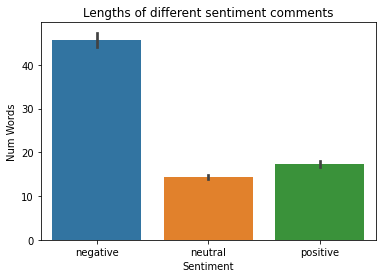

In [ ]:
df['num_words'] = df['Comment'].apply(lambda c: len(c.split()))

sns.barplot(x='sentiment', y='num_words', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Num Words')
plt.title('Lengths of different sentiment comments')
plt.show()

In [ ]:
news_top = reddit.subreddit('news').top(limit=100)

post_titles = []
all_comments = []
num_posts = 0
curr = time.time()
for post in news_top:
  post_titles.append(post.title)

  num_comments = 0
  comments_list =[]

  for comment in post.comments:
    if not comment.stickied and not isinstance(comment, MoreComments):
      comment_body = clean_tweet(comment.body)
      comments_list.append(comment_body)
      num_comments += 1
    if (num_comments == 10): break

  all_comments.append(comments_list)

  num_posts += 1
  if (num_posts % 10 == 0):
    secs = int(time.time() - curr)
    print(f"Completed 10 so far in {secs} seconds, now at {num_posts} posts completed!")
    curr = time.time()

print(np.array(all_comments).shape)
print(len(post_titles))

Completed 10 so far in 61 seconds, now at 10 posts completed!
Completed 10 so far in 51 seconds, now at 20 posts completed!
Completed 10 so far in 48 seconds, now at 30 posts completed!
Completed 10 so far in 49 seconds, now at 40 posts completed!
Completed 10 so far in 78 seconds, now at 50 posts completed!
Completed 10 so far in 152 seconds, now at 60 posts completed!
Completed 10 so far in 132 seconds, now at 70 posts completed!
Completed 10 so far in 55 seconds, now at 80 posts completed!
Completed 10 so far in 55 seconds, now at 90 posts completed!
Completed 10 so far in 48 seconds, now at 100 posts completed!
(100, 10)
100


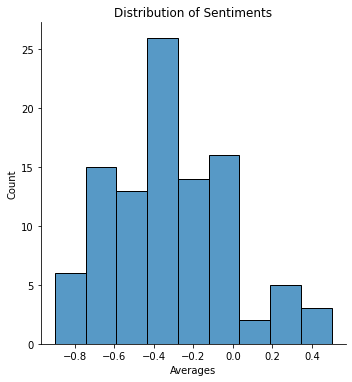

In [ ]:
preds = model.predict(np.array(all_comments).flatten())

strToNum = {'negative': -1, 'neutral': 0, 'positive': 1}
preds = [strToNum[pred] for pred in preds]

avgs = []
for i in range(0, len(preds), 10):
  the_preds = preds[i:i+10]
  mean = np.array(the_preds).mean()
  avgs.append(mean)

sns.displot(avgs)
plt.xlabel('Averages')
plt.title('Distribution of Sentiments')
plt.show()

In [ ]:
index_lowest = [i for i in range(len(avgs)) if avgs[i] == min(avgs)][0]
index_highest = [i for i in range(len(avgs)) if avgs[i] == max(avgs)][0]

negative_post = post_titles[index_lowest]
amount_negative = min(avgs)
positive_post = post_titles[index_highest]
amount_positive = max(avgs)

print(f"Most negatively seen post, with the average rating of {amount_negative}:")
print(negative_post + "\n")

print(f"Most positvely seen post, with the average rating of {amount_positive}:")
print(positive_post)



Most negatively seen post, with the average rating of -0.9:
Family of 11-year-old boy who died in Texas deep freeze files $100 million suit against power companies

Most positvely seen post, with the average rating of 0.5:
Report: Stan Lee dead at 95 - Story


In [ ]:
for post, rating in zip(post_titles, avgs):
  print(f"Post: {post}\nAverage Rating: {rating}\n")

Post: Joe Biden elected president of the United States
Average Rating: -0.4

Post: Chauvin found guilty of murder, manslaughter in George Floyd's death
Average Rating: -0.5

Post: President Donald Trump says he has tested positive for coronavirus
Average Rating: -0.3

Post: Blizzard Employees Staged a Walkout After the Company Banned a Gamer for Pro-Hong Kong Views
Average Rating: -0.5

Post: Trump has left the White House for the last time as President
Average Rating: 0.2

Post: Kobe Bryant killed in helicopter crash in California
Average Rating: -0.6

Post: 'Jeopardy' host Alex Trebek dies at 80 due to pancreatic cancer
Average Rating: -0.2

Post: Queen Elizabeth II, has died
Average Rating: -0.3

Post: Scientist Stephen Hawking has died aged 76
Average Rating: -0.1

Post: Jeffrey Epstein's autopsy more consistent with homicidal strangulation than suicide, Dr. Michael Baden reveals
Average Rating: -0.3

Post: F.C.C. Announces Plan to Repeal Net Neutrality
Average Rating: -0.5

Post: 

In [19]:
user = reddit.redditor('OPINION_IS_UNPOPULAR')
submissions = user.submissions.new(limit=None)
strToNum = {'negative': -1, 'neutral': 0, 'positive': 1}

dates = []
avg_rating = []
for post in submissions:
  title = post.title.lower()
  if 'weekend' in title and post.subreddit == 'wallstreetbets':
    dates.append(title[45:])

    num_comments = 0
    comments = []
    for comment in post.comments:
        if not comment.stickied and not isinstance(comment, MoreComments):
          comment_body = clean_tweet(comment.body)
          comments.append(comment_body)
          num_comments += 1
        if (num_comments == 10): break

    preds = model.predict(comments)
    pred_mean = np.array([strToNum[pred] for pred in preds]).mean()
    avg_rating.append(pred_mean)

print(len(avg_rating))

21


In [20]:
dates.reverse()
avg_rating.reverse()
print(dates)

['august 13, 2022', 'august 20, 2022', 'august 27, 2022', 'september 03, 2022', 'september 10, 2022', 'september 17, 2022', 'september 24, 2022', 'october 01, 2022', 'october 08, 2022', 'october 15, 2022', 'october 22, 2022', 'october 29, 2022', 'november 05, 2022', 'november 12, 2022', 'november 19, 2022', 'november 26, 2022', 'december 03, 2022', 'december 10, 2022', 'december 17, 2022', 'december 24, 2022', 'december 31, 2022']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


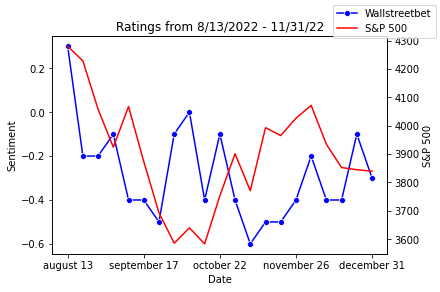

In [21]:
sp_values = [4280.15, 4228.48, 4057.66, 3924.26, 4067.36, 3873.33, 3693.23, 3585.62, 3639.66, 3583.07, 3752.75,
             3901.06, 3770.55, 3992.93, 3965.34, 4026.12, 4071.70, 3934.38, 3852.36, 3844.82, 3839.50]

ax = sns.lineplot(range(21), avg_rating, marker='o', color='b')
ax2 = ax.twinx()
sns.lineplot(range(21), sp_values, color='r', ax=ax2)

plt.xticks(range(0, 22, 5), labels=[dates[i][:-6] for i in range(0, 22, 5)])
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment')
ax2.set_ylabel('S&P 500')
ax.figure.legend(['Wallstreetbet', 'S&P 500'])
plt.title('Ratings from 8/13/2022 - 11/31/22')
plt.show()

In [22]:
for date, rating in zip(dates, avg_rating):
  print(f"Date: {date} Rating: {rating}")

Date: august 13, 2022 Rating: 0.3
Date: august 20, 2022 Rating: -0.2
Date: august 27, 2022 Rating: -0.2
Date: september 03, 2022 Rating: -0.1
Date: september 10, 2022 Rating: -0.4
Date: september 17, 2022 Rating: -0.4
Date: september 24, 2022 Rating: -0.5
Date: october 01, 2022 Rating: -0.1
Date: october 08, 2022 Rating: 0.0
Date: october 15, 2022 Rating: -0.4
Date: october 22, 2022 Rating: -0.1
Date: october 29, 2022 Rating: -0.4
Date: november 05, 2022 Rating: -0.6
Date: november 12, 2022 Rating: -0.5
Date: november 19, 2022 Rating: -0.5
Date: november 26, 2022 Rating: -0.4
Date: december 03, 2022 Rating: -0.2
Date: december 10, 2022 Rating: -0.4
Date: december 17, 2022 Rating: -0.4
Date: december 24, 2022 Rating: -0.1
Date: december 31, 2022 Rating: -0.3


In [23]:
sp_values = [4280.15, 4228.48, 4057.66, 3924.26, 4067.36, 3873.33, 3693.23, 3585.62, 3639.66, 3583.07, 3752.75,
             3901.06, 3770.55, 3992.93, 3965.34, 4026.12, 4071.70, 3934.38, 3852.36, 3844.82, 3839.50]
print(np.corrcoef(sp_values[1:], avg_rating[:-1]))

[[1.         0.19665288]
 [0.19665288 1.        ]]
